In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


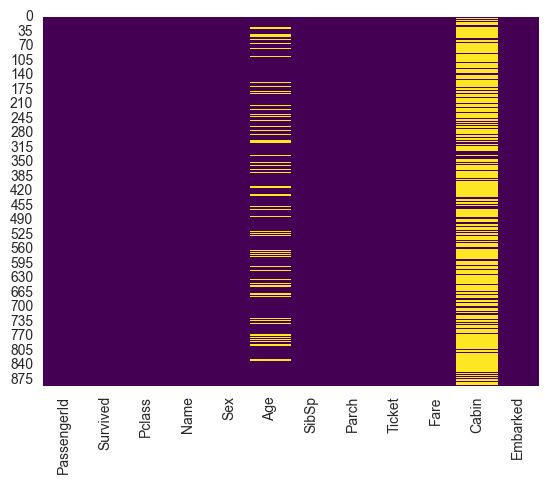

In [250]:
sns.heatmap(df.isnull(),cmap='viridis',cbar=False)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

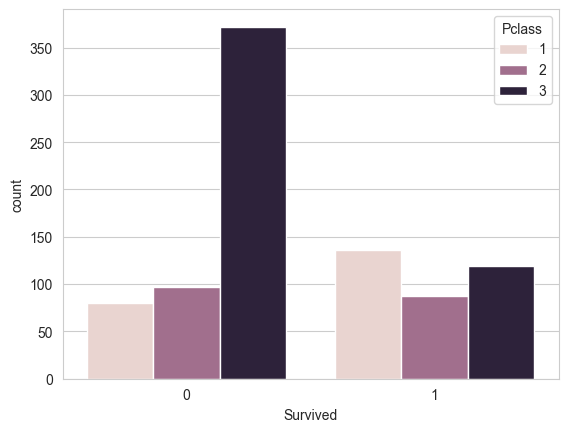

In [251]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: xlabel='SibSp', ylabel='count'>

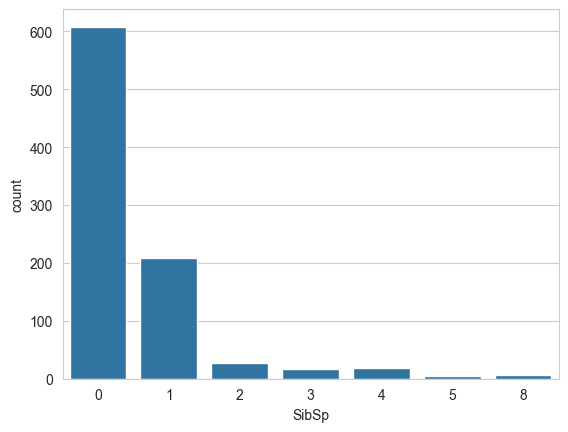

In [252]:
sns.countplot(x='SibSp',data=df)

/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_97756/1000162636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Embarked',y='Age',data=df,palette='winter')


<Axes: xlabel='Embarked', ylabel='Age'>

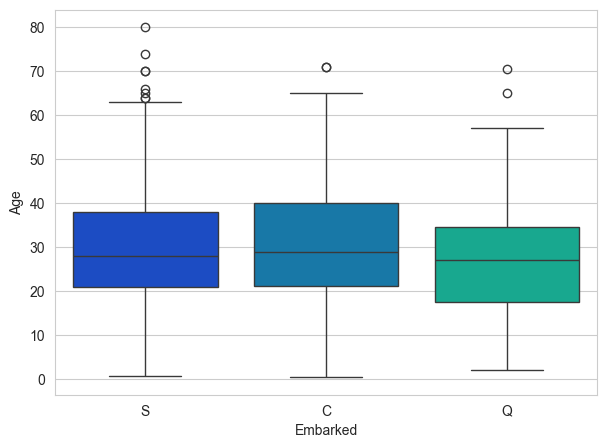

In [253]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Embarked',y='Age',data=df,palette='winter')

In [254]:
def impute_agee(cols):
    Age = cols[0]
    Embarked = cols[1]
    
    if pd.isnull(Age):

        if Embarked == 'S':
            return 28

        elif Embarked == 'C':
            return 29

        else:
            return 27

    else:
        return Age

In [255]:
# df['Age'] = df[['Age','Embarked']].apply(impute_agee,axis=1)

/var/folders/sq/0c4j_x091jngfd2nls5zlk240000gn/T/ipykernel_97756/1214636467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

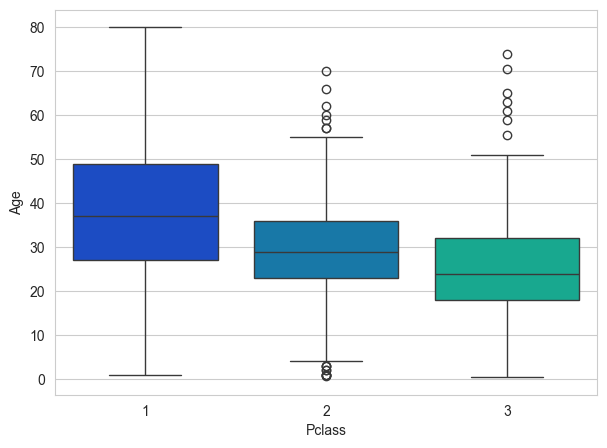

In [256]:
plt.figure(figsize=(7, 5))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [257]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [258]:
#df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [259]:
median_values = df.groupby('Pclass')['Fare'].median().reset_index()
print(median_values)

   Pclass     Fare
0       1  60.2875
1       2  14.2500
2       3   8.0500


In [260]:
dummy=pd.get_dummies(df['Embarked'],drop_first=True)
dummy.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [261]:
dummy["Q"] = dummy["Q"].astype(int)
dummy["S"] = dummy["S"].astype(int)
dummy.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [262]:
df=pd.concat([df,dummy],axis='columns')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [263]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [264]:
df.columns[df.isna().any()]

Index(['Age'], dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

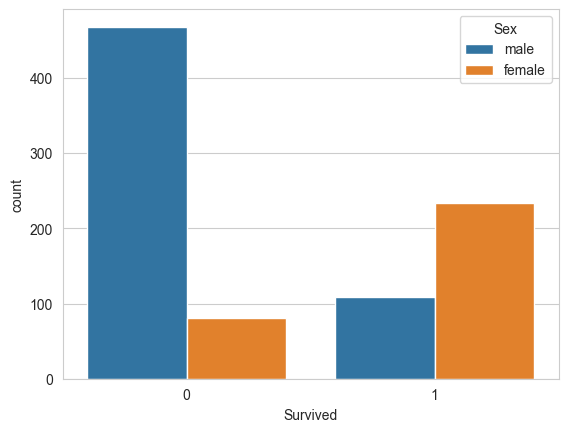

In [265]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [266]:
df.shape

(891, 9)

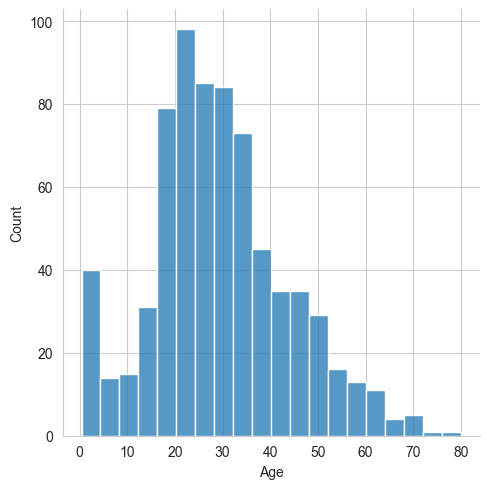

In [267]:
sns.displot(df['Age'].dropna(),kde=False)

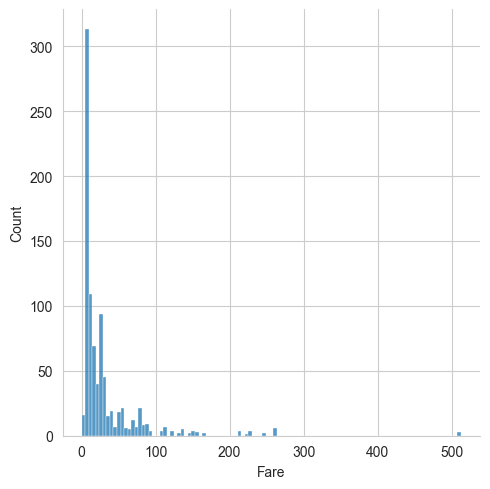

In [268]:
sns.displot(df['Fare'].dropna(),kde=False)

<Axes: ylabel='Age'>

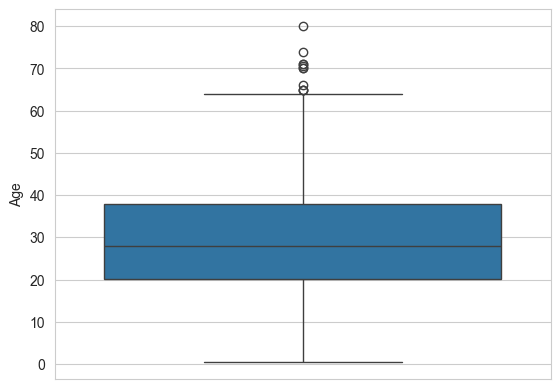

In [269]:
sns.boxplot(df['Age'])

In [270]:
# upper_limit=df['Age'].mean()+ 3*df['Age'].std()
# lower_limit=df['Age'].mean()- 3*df['Age'].std()
# print('upper limit',upper_limit)
# print('lower limit',lower_limit)

In [271]:
# df.loc[(df['Age']>upper_limit) | (df['Age']<lower_limit)]

In [272]:
# new_df=df.loc[(df['Age']<upper_limit) & (df['Age']>lower_limit)]
# print(len(df))
# print(len(new_df))
# print(len(df)-len(new_df))

In [273]:
# sns.boxplot(new_df['Age'])

In [274]:
# capp=df.copy()
# capp.loc[capp['Age']>upper_limit,'Age']=upper_limit
# capp.loc[capp['Age']<lower_limit,'Age']=lower_limit

In [275]:
# sns.boxplot(capp['Age'])

In [276]:
# print(len(df))
# print(len(capp))

In [277]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(20.125, 38.0, 17.875)

In [278]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-6.6875, 64.8125)

<Axes: ylabel='Age'>

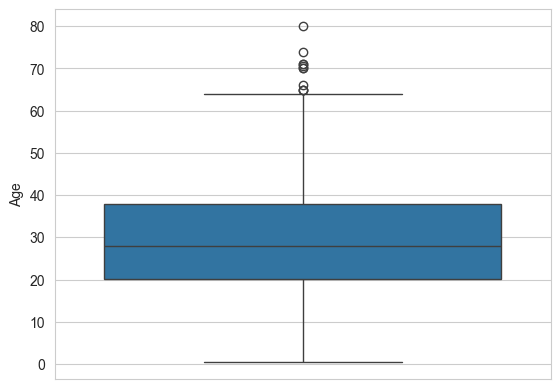

In [279]:
sns.boxplot(df['Age'])

In [280]:
df.loc[(df['Age']>upper_limit) | (df['Age']<lower_limit)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
33,0,2,male,66.0,0,0,10.5000,0,1
54,0,1,male,65.0,0,1,61.9792,0,0
96,0,1,male,71.0,0,0,34.6542,0,0
116,0,3,male,70.5,0,0,7.7500,1,0
280,0,3,male,65.0,0,0,7.7500,1,0
456,0,1,male,65.0,0,0,26.5500,0,1
493,0,1,male,71.0,0,0,49.5042,0,0
630,1,1,male,80.0,0,0,30.0000,0,1
672,0,2,male,70.0,0,0,10.5000,0,1
745,0,1,male,70.0,1,1,71.0000,0,1


In [281]:
new_df=df.loc[(df['Age']<upper_limit) & (df['Age']>lower_limit)]
print(len(df))
print(len(new_df))
print(len(df)-len(new_df))

891
703
188


<Axes: ylabel='Age'>

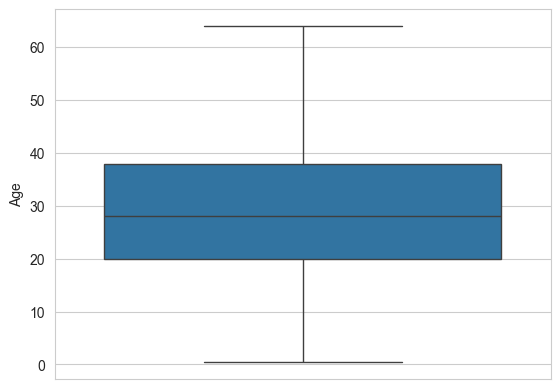

In [282]:
sns.boxplot(new_df['Age'])

In [283]:
# q1=new_df['Age'].quantile(0.25)
# q3=new_df['Age'].quantile(0.75)
# iqr=q3-q1
# q1,q3,iqr

In [284]:
# upper_limit=q3+(1.5*iqr)
# lower_limit=q1-(1.5*iqr)
# lower_limit,upper_limit

In [285]:
# new_df.loc[(new_df['Age']>upper_limit) | (new_df['Age']<lower_limit)]

In [286]:
# new_df=new_df.loc[(df['Age']<upper_limit) & (new_df['Age']>lower_limit)]

In [287]:
# sns.boxplot(new_df['Age'])

In [288]:
# new_df=new_df.loc[(df['Age']<upper_limit) & (new_df['Age']>lower_limit)]

In [289]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


<Axes: ylabel='Fare'>

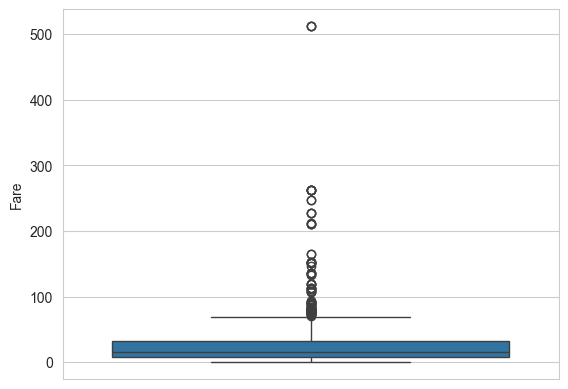

In [290]:
sns.boxplot(new_df['Fare'])

In [291]:
q1=new_df['Fare'].quantile(0.25)
q3=new_df['Fare'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
newest_df=new_df.loc[(new_df['Fare']<upper_limit) & (new_df['Fare']>lower_limit)]
print(len(new_df))
print(len(newest_df))
print(len(new_df)-len(newest_df))

703
607
96


<Axes: ylabel='Fare'>

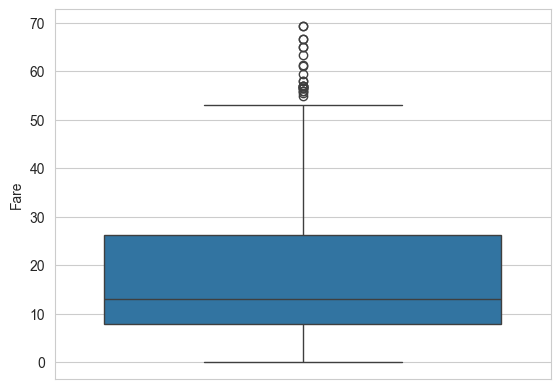

In [292]:
sns.boxplot(newest_df['Fare'])

In [293]:
q1=newest_df['Fare'].quantile(0.25)
q3=newest_df['Fare'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
final_df=newest_df.loc[(newest_df['Fare']<upper_limit) & (newest_df['Fare']>lower_limit)]
print(len(newest_df))
print(len(final_df))
print(len(newest_df)-len(final_df))

607
583
24


<Axes: ylabel='Fare'>

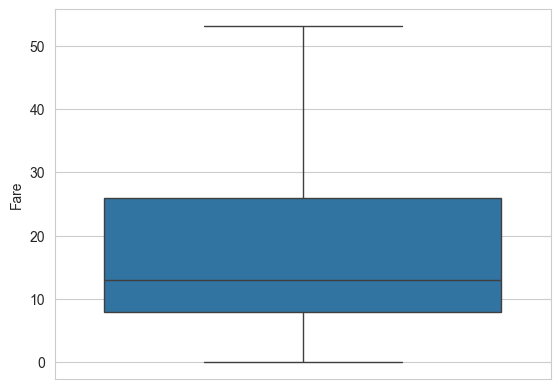

In [294]:
sns.boxplot(final_df['Fare'])

<Axes: ylabel='SibSp'>

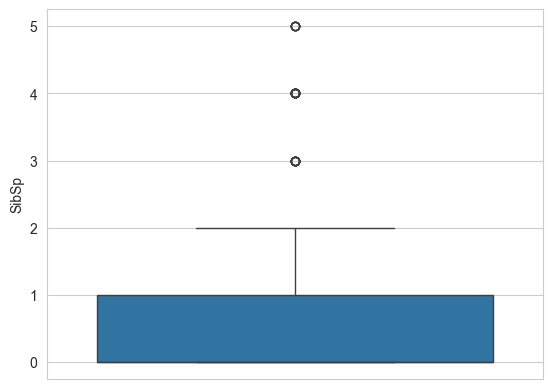

In [295]:
sns.boxplot(newest_df['SibSp'])

In [296]:
q1=newest_df['SibSp'].quantile(0.25)
q3=newest_df['SibSp'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
final_df=newest_df.loc[(newest_df['SibSp']<upper_limit) & (newest_df['SibSp']>lower_limit)]
print(len(newest_df))
print(len(final_df))
print(len(newest_df)-len(final_df))

607
575
32


<Axes: ylabel='SibSp'>

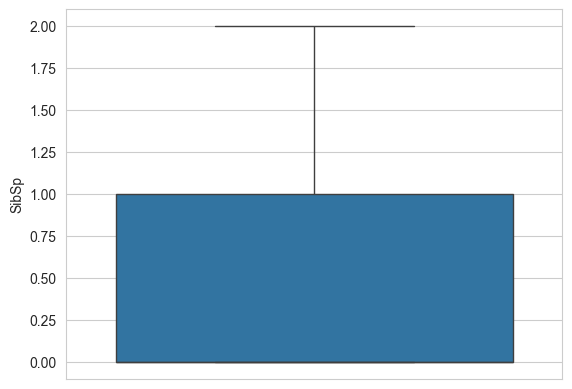

In [297]:
sns.boxplot(final_df['SibSp'])

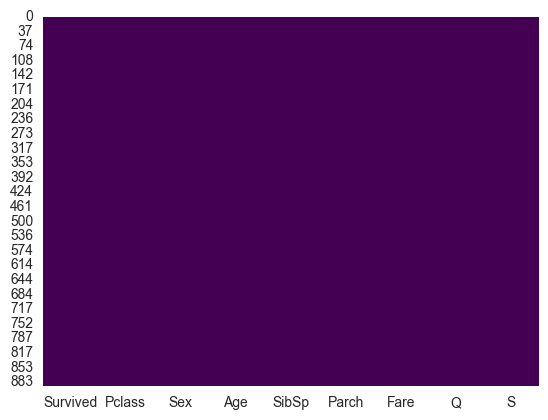

In [298]:
sns.heatmap(newest_df.isnull(),cmap='viridis',cbar=False)
plt.show()

Text(0, 0.5, 'Survived')

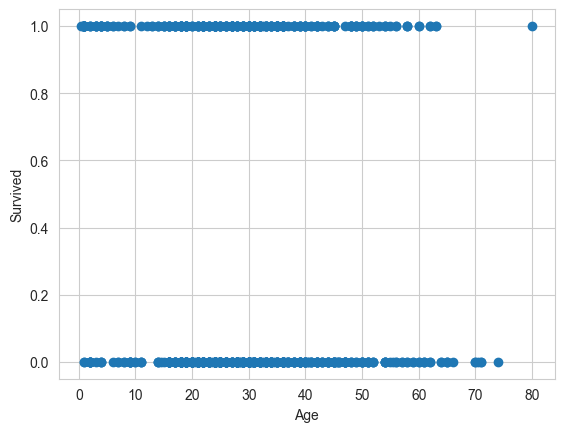

In [299]:
plt.scatter(df['Age'], df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

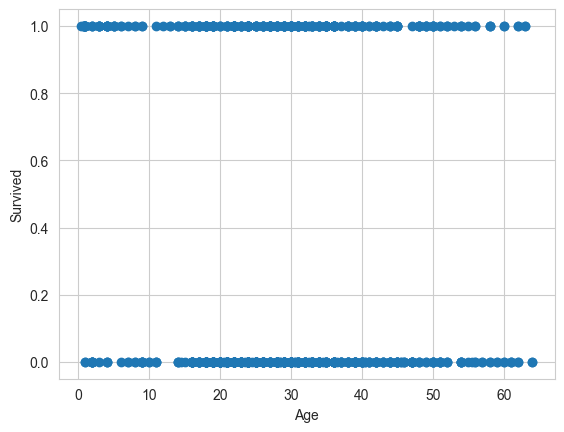

In [300]:
plt.scatter(new_df['Age'], new_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

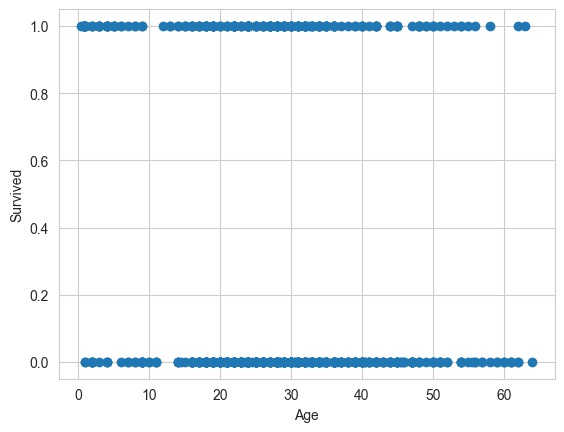

In [301]:
plt.scatter(newest_df['Age'],newest_df['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

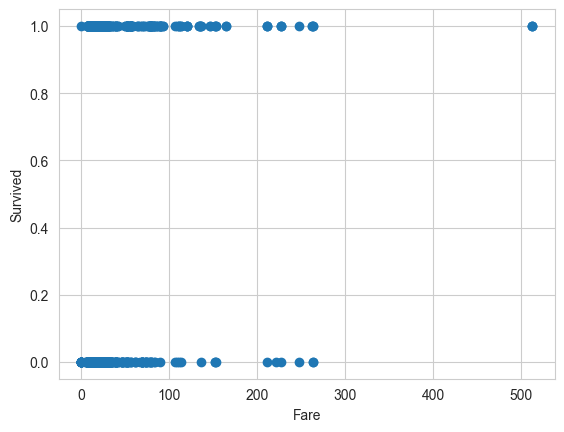

In [302]:
plt.scatter(df['Fare'], df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

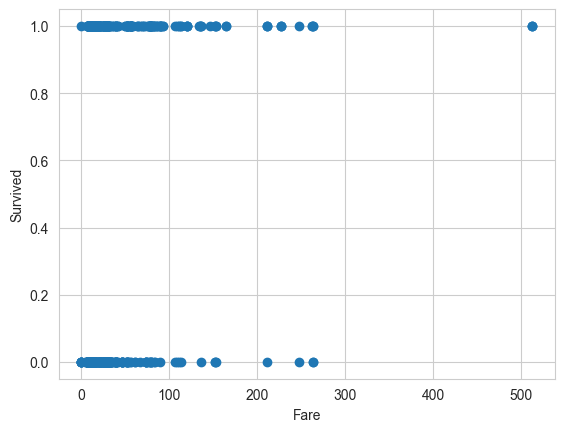

In [303]:
plt.scatter(new_df['Fare'], new_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

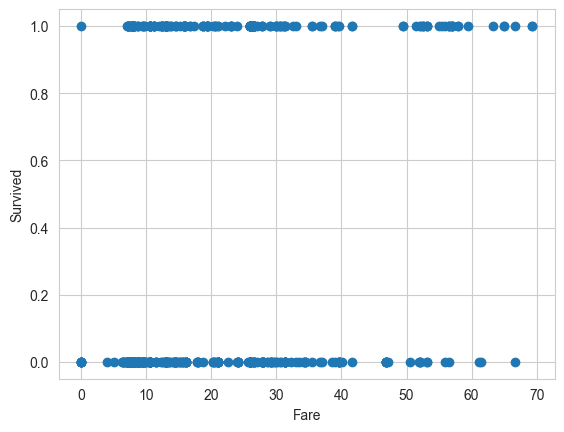

In [304]:
plt.scatter(newest_df['Fare'], newest_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

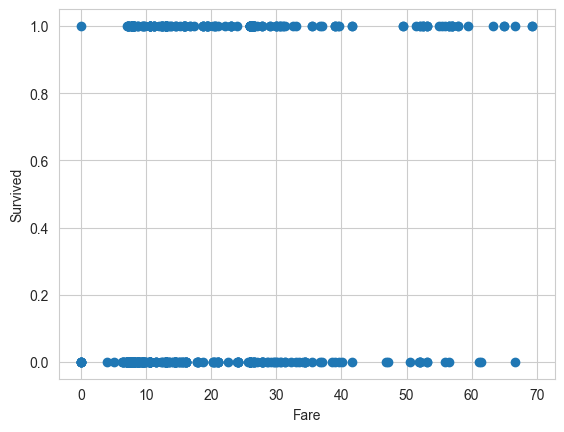

In [305]:
plt.scatter(final_df['Fare'], final_df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

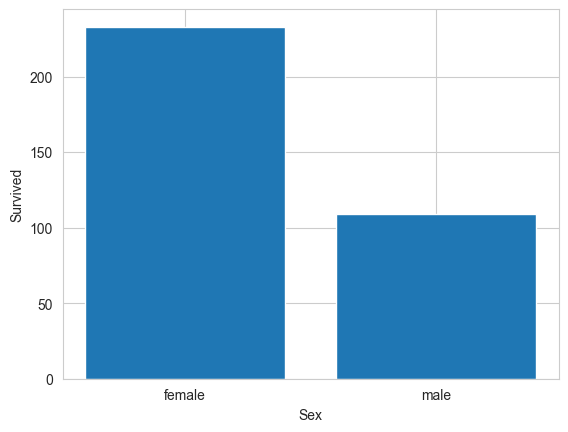

In [306]:
survived_counts = df.groupby('Sex')['Survived'].sum()
plt.bar(survived_counts.index, survived_counts.values)
plt.xlabel('Sex')
plt.ylabel('Survived')

In [307]:
newest_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

In [308]:
newest_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,male,22.0,1,0,7.2500,0,1
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1
6,0,1,male,54.0,0,0,51.8625,0,1


In [309]:
dummies=pd.get_dummies(newest_df['Sex'],drop_first=True)
dummies.head()

,male
0,True
2,False
3,False
4,True
6,True


In [310]:
dummies["male"] = dummies["male"].astype(int)
dummies.head()

,male
0,1
2,0
3,0
4,1
6,1


In [311]:
newest_df=pd.concat([newest_df,dummies],axis='columns')
newest_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,male,22.0,1,0,7.2500,0,1,1
2,1,3,female,26.0,0,0,7.9250,0,1,0
3,1,1,female,35.0,1,0,53.1000,0,1,0
4,0,3,male,35.0,0,0,8.0500,0,1,1
6,0,1,male,54.0,0,0,51.8625,0,1,1


In [312]:
newest_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
male        0
dtype: int64

In [313]:
newest_df.drop('Sex',axis='columns',inplace=True)

In [314]:
newest_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
6,0,1,54.0,0,0,51.8625,0,1,1


In [315]:
newest_df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
male        0
dtype: int64

In [316]:
co=newest_df.corr()
co

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
Survived,1.000000,-0.284566,-0.121769,-0.030771,0.095105,0.244011,-0.029205,-0.120595,-0.492699
Pclass,-0.284566,1.000000,-0.372500,0.123119,0.112936,-0.601713,0.133615,0.061025,0.061632
Age,-0.121769,-0.372500,1.000000,-0.359636,-0.214464,0.068134,-0.065475,0.081350,0.121814
SibSp,-0.030771,0.123119,-0.359636,1.000000,0.402685,0.373784,0.053788,0.022819,-0.114152
Parch,0.095105,0.112936,-0.214464,0.402685,1.000000,0.326581,0.013036,-0.009201,-0.287323
Fare,0.244011,-0.601713,0.068134,0.373784,0.326581,1.000000,-0.082591,-0.101182,-0.164568
Q,-0.029205,0.133615,-0.065475,0.053788,0.013036,-0.082591,1.000000,-0.438596,-0.053284
S,-0.120595,0.061025,0.081350,0.022819,-0.009201,-0.101182,-0.438596,1.000000,0.093615
male,-0.492699,0.061632,0.121814,-0.114152,-0.287323,-0.164568,-0.053284,0.093615,1.000000


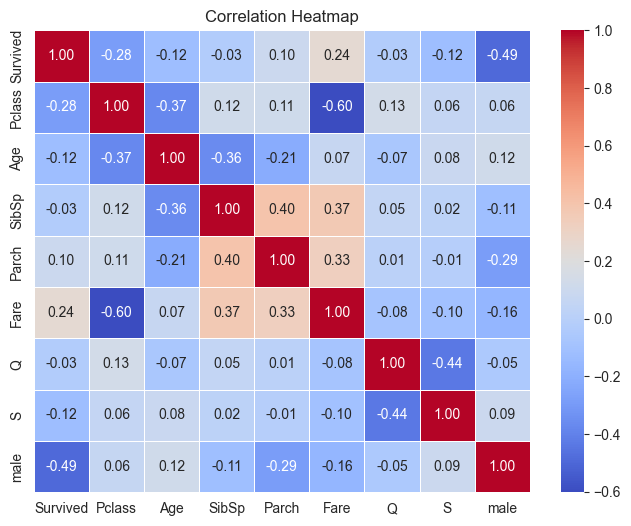

In [317]:
plt.figure(figsize=(8, 6))
sns.heatmap(co, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [318]:
newest_df.drop(['SibSp','S','Q','Parch'],axis='columns')

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
6,0,1,54.0,51.8625,1
...,...,...,...,...,...
885,0,3,39.0,29.1250,0
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
889,1,1,26.0,30.0000,1


In [319]:
newest_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,male
0,0,3,22.0,1,0,7.2500,0,1,1
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1
6,0,1,54.0,0,0,51.8625,0,1,1


In [320]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import make_classification

# # Generate a synthetic dataset
# X=newest_df[['SibSp','Age','Fare','male','Pclass']]
# y=newest_df['Survived']

# best_seed = None
# best_accuracy = 0

# # Define the range of seeds to try
# seeds = range(1, 90)

# for seed in seeds:
#     # Split the dataset
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
#     # Train the model
#     model = LogisticRegression(random_state=seed)
#     model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Track the best seed and accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_seed = seed

# print(f'Best random seed: {best_seed}')
# print(f'Best accuracy: {best_accuracy}')


In [321]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from scipy.stats import uniform

# # Assuming the Titanic dataset is loaded into `df`
# # Example dataset snippet:
# X=newest_df[['Age','Fare','male','Pclass']]
# y=newest_df['Survived']

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define the Logistic Regression model
# model = LogisticRegression()

# # Define the parameter grid for RandomizedSearchCV
# param_distributions = {
#     'penalty': ['l2', 'none'],  # Limited solvers support 'l1' and 'elasticnet'
#     'C': uniform(0.1, 10),  # Regularization strength
#     'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Solvers that support 'l2' and 'none'
#     'max_iter': [100, 200, 300, 400, 500],
#     'random_state': [0, 1, 42, 29, 9, 95]
# }

# # Initialize RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_distributions,
#     n_iter=50,  # Number of parameter settings that are sampled
#     cv=5,  # Cross-validation splitting strategy
#     scoring='accuracy',
#     n_jobs=-1,  # Use all available cores
#     random_state=42
# )

# # Fit RandomizedSearchCV on training data
# random_search.fit(x_train, y_train)

# # Get the best parameters and best estimator
# best_params = random_search.best_params_
# print("Best parameters found: ", best_params)

# best_estimator = random_search.best_estimator_

# # Predict on training and test sets
# y_train_pred = best_estimator.predict(x_train)
# y_test_pred = best_estimator.predict(x_test)

# # Calculate training and test accuracies
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Training Accuracy: {train_accuracy}")
# print(f"Test Accuracy: {test_accuracy}")

# # Generate classification report on test set
# report = classification_report(y_test, y_test_pred)
# print(f"Classification Report:\n{report}")


In [322]:
newest_df.to_csv("refinedtitanic.csv",index=False)

In [323]:
from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(newest_df[['Age','Fare','SibSp','male','Parch','S','Q']],newest_df['Survived'],test_size=0.2,random_state=9)
x_train,x_test,y_train,y_test=train_test_split(newest_df[['Age','Fare','male','Pclass']],newest_df[['Survived']],test_size=0.2,random_state=29)

In [324]:
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear') 
clf.fit(x_train,y_train) 
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

/Users/avyaahuja/XLSCOUT/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8442622950819673

In [325]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.6,algorithm='SAMME')
model = abc.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc


/Users/avyaahuja/XLSCOUT/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.860655737704918

In [326]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(eval_metric='logloss')
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8524590163934426

In [327]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# # Creating the logistic regression pipeline
# clf = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('classifier', LogisticRegression(max_iter=100))
# ])

# # Defining the parameter grid
# param_grid = {
#     'classifier__C': [1],
#     'classifier__penalty': ['l2'],
#     'classifier__solver': ['lbfgs'],
# }

# # Setting up GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')


In [328]:
# # Fitting the model
# grid_search.fit(x_train, y_train)

# # Getting the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Best estimator
# best_estimator = grid_search.best_estimator_


In [329]:
# from sklearn.metrics import accuracy_score, classification_report

# # Predicting on the test set
# y_pred = best_estimator.predict(x_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f"Classification Report:\n{report}")


In [330]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000, regularization='none', alpha=0.01):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.regularization = regularization
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            if self.regularization == 'l2':
                dw += (self.alpha / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.alpha / n_samples) * np.sign(self.weights)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y <= 0.5 else 1 for y in y_pred]
        return class_pred

    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred)/len(y_true)

def custom_grid_search(X, y, param_grid, cv=5, random_state_range=None):
    best_params = None
    best_score = 0
    best_random_state = None

    if random_state_range is None:
        random_state_range = [None]

    for random_state in random_state_range:
        for lr in param_grid['lr']:
            for n_iters in param_grid['n_iters']:
                for regularization in param_grid['regularization']:
                    for alpha in param_grid['alpha']:
                        scores = []
                        kf = KFold(n_splits=cv, shuffle=True, random_state=random_state)
                        for train_index, val_index in kf.split(X):
                            X_train, X_val = X[train_index], X[val_index]
                            y_train, y_val = y[train_index], y[val_index]

                            model = LogisticRegression(lr=lr, n_iters=n_iters, regularization=regularization, alpha=alpha)
                            model.fit(X_train, y_train)
                            y_pred = model.predict(X_val)
                            scores.append(model.accuracy(y_val, y_pred))

                        mean_score = np.mean(scores)
                        if mean_score > best_score:
                            best_score = mean_score
                            best_params = {'lr': lr, 'n_iters': n_iters, 'regularization': regularization, 'alpha': alpha}
                            best_random_state = random_state

    return best_params, best_score, best_random_state

# Create a sample dataset
X=newest_df[['Age','Fare','male','Pclass']]
y=newest_df['Survived']
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Ensure X and y are numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'lr': [0.001, 0.01, 0.1],
    'n_iters': [1000, 2000],
    'regularization': ['none', 'l1', 'l2'],
    'alpha': [0.01, 0.1, 1.0]
}

# Define a range of random states to search over
random_state_range = list(range(10, 50))

# Perform custom grid search
best_params, best_score, best_random_state = custom_grid_search(X_train, y_train, param_grid, cv=5, random_state_range=random_state_range)
print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")
print(f"Best random state: {best_random_state}")

# Train and evaluate the best model on the test set with the best random state
best_model = LogisticRegression(**best_params)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = best_model.accuracy(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")


KeyboardInterrupt: 

In [ ]:
# param_grid = {
#     'lr': [0.001, 0.01, 0.1],
#     'n_iters': [1000, 2000],
#     'regularization': ['none', 'l1', 'l2'],
#     'alpha': [0.01, 0.1, 1.0]
# }

In [ ]:
# from logisticreg import LogisticRegression
# clf=LogisticRegression()
# clf.fit(x_train,y_train)
# y_pred=clf.predict(x_test)

/Users/avyaahuja/XLSCOUT/.venv/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# def accuracy(y_pred,y_test):
#     return np.sum(y_pred==y_test)/len(y_test)
# acc=accuracy(y_pred,y_test)
# print(acc)

0.5573770491803278


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# print("Model Parameters:")
# print("Coefficient:", model.coef_)
# print("Intercept:", model.intercept_)
# print("Classes:", model.classes_)
# print("Number of iterations:", model.n_iter_)
# print("Solver used:", model.solver)
# print("C (Regularization strength):", model.C)
# print("Penalty:", model.penalty)
# print("Multi-class setting:", model.multi_class)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,predict)
accuracy

0.7131147540983607

In [ ]:
pre=model.predict(x_train)
aci=accuracy_score(y_train,pre)
aci

0.6185567010309279

In [ ]:
clog=confusion_matrix(y_test,predict)
print(clog)

[[72 10]
 [13 27]]


In [ ]:
crlog=classification_report(y_test,predict)
print(crlog)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.73      0.68      0.70        40

    accuracy                           0.81       122
   macro avg       0.79      0.78      0.78       122
weighted avg       0.81      0.81      0.81       122



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k=3
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
predictknn=knn.predict(x_test)
predictknn

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracyknn=accuracy_score(y_test,predictknn)
accuracyknn

0.7295081967213115

In [ ]:
cknn=confusion_matrix(y_test,predictknn)
print(cknn)

[[69 13]
 [20 20]]


In [ ]:
crknn=classification_report(y_test,predictknn)
print(crknn)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        82
           1       0.61      0.50      0.55        40

    accuracy                           0.73       122
   macro avg       0.69      0.67      0.68       122
weighted avg       0.72      0.73      0.72       122



In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score, classification_report
# clf = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('classifier', DecisionTreeClassifier())
# ])

# # Defining the parameter grid for GridSearchCV
# param_grid = {
#     'classifier__criterion': ['gini', 'entropy'],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__random_state': [0, 1, 42, 29, 9, 95]  # Adding random_state to the parameter grid
# }

# # Setting up GridSearchCV
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fitting the model
# grid_search.fit(x_train, y_train)

# # Getting the best parameters
# best_params = grid_search.best_params_
# print("Best parameters found: ", best_params)

# # Best estimator
# best_estimator = grid_search.best_estimator_

# # Predicting on the test set
# y_pred = best_estimator.predict(x_test)

# # Evaluating the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(f"Classification Report:\n{report}")

In [ ]:
# my=df.drop(['Survived'],axis='columns')
# target=df['Survived']

In [ ]:
# my=newest_df[['Age','Fare','male','Pclass']]
# target=newest_df['Survived']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_gini = DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3, min_samples_leaf=5)
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
dtpredg=dt_gini.predict(x_test)
dtpredg

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
dtaccg=accuracy_score(y_test,dtpredg)
dtaccg

0.8114754098360656

In [ ]:
dtcmg=confusion_matrix(y_test,dtpredg)
print(dtcmg)

[[72 10]
 [13 27]]


In [ ]:
pre=dt_gini.predict(x_train)
aci=accuracy_score(y_train,pre)
aci

0.8144329896907216

In [ ]:
dtcrg=classification_report(y_test,dtpredg)
print(dtcrg)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        82
           1       0.73      0.68      0.70        40

    accuracy                           0.81       122
   macro avg       0.79      0.78      0.78       122
weighted avg       0.81      0.81      0.81       122



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(dt_gini,feature_names=my.columns,class_names=['Not Survived','Survived'])
plt.show()

NameError: name 'my' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
dt_ent = DecisionTreeClassifier(criterion="entropy",random_state=100, max_depth=3, min_samples_leaf=5)
dt_ent.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
dtprede=dt_ent.predict(x_test)
dtprede

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
dtacce=accuracy_score(y_test,dtprede)
dtacce

0.8934426229508197

In [ ]:
pre=dt_ent.predict(x_train)
aci=accuracy_score(y_train,pre)
aci

0.7938144329896907

In [ ]:
dtcme=confusion_matrix(y_test,dtprede)
print(dtcme)

[[73  4]
 [ 9 36]]


In [ ]:
dtcre=classification_report(y_test,dtprede)
print(dtcre)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        77
           1       0.90      0.80      0.85        45

    accuracy                           0.89       122
   macro avg       0.90      0.87      0.88       122
weighted avg       0.89      0.89      0.89       122



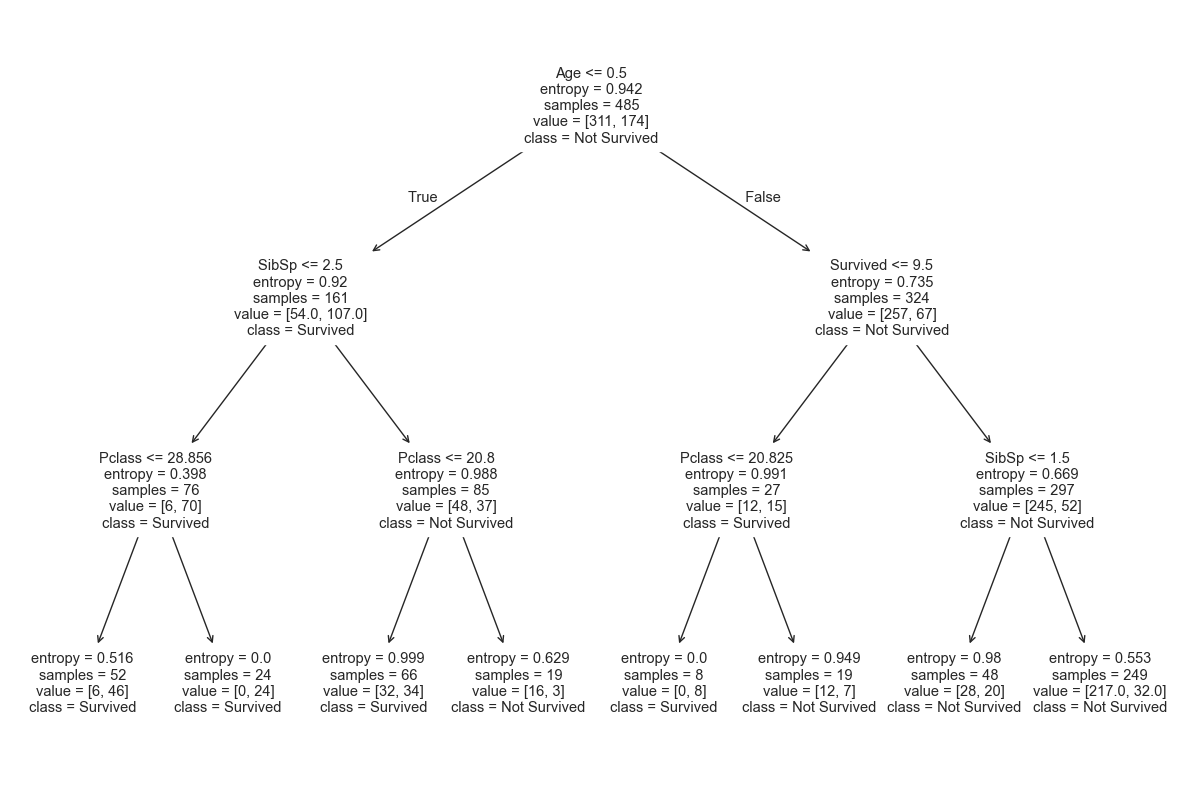

In [ ]:
plt.figure(figsize=(15,10))
plot_tree(dt_ent,feature_names=newest_df.columns,class_names=['Not Survived','Survived'])
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# X=newest_df[['Age','Fare','male','Pclass']]
# y=newest_df['Survived']


# # For demonstration, let's use a synthetic dataset
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# best_seed = None
# best_accuracy = 0

# # Define the range of seeds to try
# seeds = range(1, 101)

# for seed in seeds:
#     # Split the dataset
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
    
#     # Train the model
#     model = RandomForestClassifier(random_state=seed)
#     model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Evaluate the model
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Track the best seed and accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_seed = seed

# print(f'Best random seed: {best_seed}')
# print(f'Best accuracy: {best_accuracy}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    # 'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__min_samples_split': [2,3,4],
    # 'classifier__min_samples_leaf': [1, 2,3, 4]
    'classifier__random_state': [0, 1, 42, 29, 9, 95]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(x_test)
y_trainpred = best_estimator.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
trainaccuracy = accuracy_score(y_train, y_trainpred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"TrainAccuracy: {trainaccuracy}")
print(f"Classification Report:\n{report}")

Best parameters found:  {'classifier__max_depth': 20, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 50, 'classifier__random_state': 29}
Accuracy: 0.860655737704918
TrainAccuracy: 0.9463917525773196
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        77
           1       0.85      0.76      0.80        45

    accuracy                           0.86       122
   macro avg       0.86      0.84      0.85       122
weighted avg       0.86      0.86      0.86       122



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
clf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10, 15],  
    'classifier__min_samples_split': [5, 10, 15],  
    'classifier__min_samples_leaf': [2, 4, 6],  
    'classifier__random_state': [0, 1, 42, 29, 9, 95]
}


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(x_test)
y_trainpred = best_estimator.predict(x_train)

accuracy = accuracy_score(y_test, y_pred)
trainaccuracy = accuracy_score(y_train, y_trainpred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"TrainAccuracy: {trainaccuracy}")
print(f"Classification Report:\n{report}")

Best parameters found:  {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50, 'classifier__random_state': 1}
Accuracy: 0.860655737704918
TrainAccuracy: 0.865979381443299
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89        77
           1       0.87      0.73      0.80        45

    accuracy                           0.86       122
   macro avg       0.86      0.83      0.84       122
weighted avg       0.86      0.86      0.86       122



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# rfclass=RandomForestClassifier(n_estimators=101,random_state=90)
rfclass=RandomForestClassifier()

In [ ]:
rfclass.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfpred=rfclass.predict(x_test)
rfpred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [ ]:
rfclass.score(x_train,y_train)

0.9876288659793815

In [ ]:
rfacc=accuracy_score(y_test,rfpred)
rfacc

0.8278688524590164